<h3><center>M10 Practical Challenge: Naïve Bayes Sentiment Analysis
    <br>By Anna Imhoff, Randy Leon, and Jinming Chen</br></h3></center>

<h3><b>Introduction</b></h3>

The movie review data used for this exercise can be found on [Cornell University's website](http://www.cs.cornell.edu/people/pabo/movie-review-data/) under polarity dataset v2.0. First, we will upload the pos and neg folders to our Github repository. The pos and neg folders contain 1,000 positive and 1,000 negative movie reviews in individual .txt files.  We will use various pre-processing techniques to prepare the content of the reviews for use within a Naive Bayes classification model.  Once we train the model, we will apply the testing data and discuss classification performance metrics.  We will find the 30 most informative features as determined by the Naive Bayes classifier.  Then, we will take a previously unseen, slightly negative review, and apply the classifier to see if it classifies the review correctly.

<h3><b>Data Preparation</b></h3>

Load the neg and pos directories to your Github Repository. Keep the content of the directories separated since the directories themselves serve as the labels for the classification of the reviews. <br>
Source: https://www.youtube.com/watch?v=C8rUGJouiQI

<b>Negative Movie Reviews<b>

Read the contents of each individual negative movie review from the Github directories.<br>
Source: https://stackoverflow.com/questions/60924860/python-get-list-of-csv-files-in-public-github-repository

In [1]:
#Import the required packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re 

#Store the url as a string scalar: url => str
url = "https://github.com/annaimhoff/M10/tree/main/neg"

#Issue request: r => requests.models.Response
r = requests.get(url)

#Extract text: html_doc => str
html_doc = r.text

#Parse the HTML: soup => bs4.BeautifulSoup
soup = BeautifulSoup(html_doc)

#Find all 'a' tags (which define hyperlinks): a_tags => bs4.element.ResultSet
a_tags = soup.find_all('a')

#Store a list of urls ending in .txt: urls => list
urls = ['https://raw.githubusercontent.com'+re.sub('/blob', '', link.get('href')) 
        for link in a_tags  if '.txt' in link.get('href')]

#Store a list of Data Frame names to be assigned to the list: df_list_names => list
df_list_names = [url.split('.txt')[0].split('/')[url.count('/')] for url in urls]

#Initialise an empty list the same length as the urls list: df_list => list
df_list = [pd.DataFrame([None]) for i in range(len(urls))]

#Store an empty list of dataframes: df_list => list
df_list_neg = [pd.read_csv(url, delimiter = "\t") for url in urls]

#Convert to dataframe
df_neg = pd.DataFrame(df_list_neg, columns = ['text'])

C:\Users\aimhoff\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\aimhoff\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [2]:
#Print df_neg to make sure it is as expected
df_neg

,text
0,plot : two teen couples go to a church part...
1,the happy bastard's quick movie ...
2,it is movies like these that make a jaded m...
3,""" quest for camelot "" is warner bros . ' f..."
4,synopsis : a mentally unstable man undergoi...
...,...
995,"if anything , "" stigmata "" should be taken ..."
996,"john boorman's "" zardoz "" is a goofy cinema..."
997,the kids in the hall are an acquired t...
998,there was a time when john carpenter was a ...


Remove integers and special characters<br>
Source: https://stackoverflow.com/questions/58393930/remove-integers-and-special-characters-from-column

In [3]:
df_neg = df_neg['text'].astype(str).str.replace('(?i)[^a-z]', ' ').str.replace('\s+', ' ').str.strip()
print(df_neg.dropna())

C:\Users\aimhoff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0      plot two teen couples go to a church party dri...
1      the happy bastard s quick movie review damn th...
2      it is movies like these that make a jaded movi...
3      quest for camelot is warner bros first feature...
4      synopsis a mentally unstable man undergoing ps...
                             ...                        
995    if anything stigmata should be taken as a warn...
996    john boorman s zardoz is a goofy cinematic deb...
997    the kids in the hall are an acquired taste it ...
998    there was a time when john carpenter was a gre...
999    two party guys bob their heads to haddaway s d...
Name: text, Length: 1000, dtype: object


Remove single letters such as a, i, and s

In [4]:
df_neg = df_neg.str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
print(df_neg)

0      plot two teen couples go to church party drink...
1      the happy bastard quick movie review damn that...
2      it is movies like these that make jaded movie ...
3      quest for camelot is warner bros first feature...
4      synopsis mentally unstable man undergoing psyc...
                             ...                        
995    if anything stigmata should be taken as warnin...
996    john boorman zardoz is goofy cinematic debacle...
997    the kids in the hall are an acquired taste it ...
998    there was time when john carpenter was great h...
999    two party guys bob their heads to haddaway dan...
Name: text, Length: 1000, dtype: object


C:\Users\aimhoff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Remove stop words<br>
Source: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

In [5]:
#Import stop words with nltk.
!python -m pip install -U nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

test_neg = pd.DataFrame(df_neg)

#Exclude stop words with Python's list comprehension and pandas.DataFrame.apply.
test_neg['text_without_stopwords'] = test_neg['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in 
                                                                                (stop)]))
print(test_neg)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aimhoff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  text  \
0    plot two teen couples go to church party drink...   
1    the happy bastard quick movie review damn that...   
2    it is movies like these that make jaded movie ...   
3    quest for camelot is warner bros first feature...   
4    synopsis mentally unstable man undergoing psyc...   
..                                                 ...   
995  if anything stigmata should be taken as warnin...   
996  john boorman zardoz is goofy cinematic debacle...   
997  the kids in the hall are an acquired taste it ...   
998  there was time when john carpenter was great h...   
999  two party guys bob their heads to haddaway dan...   

                                text_without_stopwords  
0    plot two teen couples go church party drink dr...  
1    happy bastard quick movie review damn bug got ...  
2    movies like make jaded movie viewer thankful i...  
3    quest camelot warner bros first feature length...  
4    synopsis ment

Create a term-document matrix for negative movie reviews.<br>
Source: https://medium.com/analytics-vidhya/naive-bayes-classifier-for-text-classification-556fabaf252b

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vec_neg = CountVectorizer()
X_neg = vec_neg.fit_transform(test_neg['text_without_stopwords'])
tdm_neg = pd.DataFrame(X_neg.toarray(), columns=vec_neg.get_feature_names())

tdm_neg

,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaliyah,aalyah,aaron,aatish,ab,aba,aban,...,zombies,zon,zone,zones,zoo,zoologist,zooms,zoot,zucker,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>Positive Movie Reviews<b>

Read the contents of each individual positive movie review from the Github directories.

In [7]:
#Store the url as a string scalar: url => str
url2 = "https://github.com/annaimhoff/M10/tree/main/pos"

#Issue request: r => requests.models.Response
r2 = requests.get(url2)

#Extract text: html_doc => str
html_doc2 = r2.text

#Parse the HTML: soup => bs4.BeautifulSoup
soup2 = BeautifulSoup(html_doc2)

#Find all 'a' tags (which define hyperlinks): a_tags => bs4.element.ResultSet
a_tags2 = soup2.find_all('a')

#Store a list of urls ending in .txt: urls => list
urls2 = ['https://raw.githubusercontent.com'+re.sub('/blob', '', link.get('href')) 
        for link in a_tags2  if '.txt' in link.get('href')]

#Store a list of Data Frame names to be assigned to the list: df_list_names => list
df_list_names2 = [url2.split('.txt')[0].split('/')[url2.count('/')] for url2 in urls2]

#Initialise an empty list the same length as the urls list: df_list => list
df_list2 = [pd.DataFrame([None]) for i in range(len(urls2))]

#Store an empty list of dataframes: df_list => list
df_list_pos = [pd.read_csv(url2, delimiter = "\t") for url2 in urls2]

#Convert to dataframe
df_pos = pd.DataFrame(df_list_pos, columns = ['text2'])

C:\Users\aimhoff\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [8]:
#Print df_pos to make sure it is as expected
df_pos

,text2
0,films adapted from comic books have had ple...
1,every now and then a movie comes along from...
2,you've got mail works alot better than it d...
3,""" jaws "" is a rare film that grabs your at..."
4,moviemaking is a lot like being the general...
...,...
995,wow ! what a m...
996,"richard gere can be a commanding actor , bu..."
997,"glory--starring matthew broderick , denzel ..."
998,steven spielberg's second epic film on worl...


Remove integers and special characters

In [9]:
df_pos = df_pos['text2'].astype(str).str.replace('(?i)[^a-z]', ' ').str.replace('\s+', ' ').str.strip()
print(df_pos.dropna())

C:\Users\aimhoff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0      films adapted from comic books have had plenty...
1      every now and then a movie comes along from a ...
2      you ve got mail works alot better than it dese...
3      jaws is a rare film that grabs your attention ...
4      moviemaking is a lot like being the general ma...
                             ...                        
995    wow what a movie it s everything a movie can b...
996    richard gere can be a commanding actor but he ...
997    glory starring matthew broderick denzel washin...
998    steven spielberg s second epic film on world w...
999    truman true man burbank is the perfect name fo...
Name: text2, Length: 1000, dtype: object


Remove single letters such as a, i, and s

In [10]:
df_pos = df_pos.str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
print(df_pos)

C:\Users\aimhoff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0      films adapted from comic books have had plenty...
1      every now and then movie comes along from susp...
2      you ve got mail works alot better than it dese...
3      jaws is rare film that grabs your attention be...
4      moviemaking is lot like being the general mana...
                             ...                        
995    wow what movie it everything movie can be funn...
996    richard gere can be commanding actor but he no...
997    glory starring matthew broderick denzel washin...
998    steven spielberg second epic film on world war...
999    truman true man burbank is the perfect name fo...
Name: text2, Length: 1000, dtype: object


Remove stop words<br>

In [11]:
stop = stopwords.words('english')

test_pos = pd.DataFrame(df_pos)

# Exclude stop words with Python's list comprehension and pandas.DataFrame.apply.
test_pos['text_without_stopwords'] = test_pos['text2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(test_pos)

                                                 text2  \
0    films adapted from comic books have had plenty...   
1    every now and then movie comes along from susp...   
2    you ve got mail works alot better than it dese...   
3    jaws is rare film that grabs your attention be...   
4    moviemaking is lot like being the general mana...   
..                                                 ...   
995  wow what movie it everything movie can be funn...   
996  richard gere can be commanding actor but he no...   
997  glory starring matthew broderick denzel washin...   
998  steven spielberg second epic film on world war...   
999  truman true man burbank is the perfect name fo...   

                                text_without_stopwords  
0    films adapted comic books plenty success wheth...  
1    every movie comes along suspect studio every i...  
2    got mail works alot better deserves order make...  
3    jaws rare film grabs attention shows single im...  
4    moviemaking l

Create term-document matrix for positive movie reviews.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vec_pos = CountVectorizer()
X_pos = vec_pos.fit_transform(test_pos['text_without_stopwords'])
tdm_pos = pd.DataFrame(X_pos.toarray(), columns=vec_pos.get_feature_names())

tdm_pos

,aardman,aaron,ab,abandon,abandoned,abandonment,abandons,abba,abbe,abberline,...,zoe,zombie,zone,zones,zoolander,zorro,zucker,zuehlke,zundel,zwick
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3><b>Frequency Distribution Plots</b></h3>

Find the top 30 words for negative and positive movie reviews.

In [13]:
#Find the top 30 words in the negative review term-document matrix
tdm_neg.sum().nlargest(30)

film         1825
movie        1452
one          1282
like          743
even          586
good          499
also          470
bad           456
plot          453
get           430
th            430
time          410
would         408
first         403
much          392
two           386
story         364
see           359
well          343
director      336
however       335
really        331
know          328
could         323
character     310
scene         288
little        272
way           269
make          262
never         262
dtype: int64

In [14]:
#Find the top 30 words in the positive review term-document matrix
tdm_pos.sum().nlargest(30)

film         2233
one          1260
movie        1125
also          683
like          668
good          529
story         519
first         472
even          466
th            457
however       450
see           432
well          405
two           398
time          391
much          389
would         345
many          337
character     323
best          322
great         317
get           316
little        312
scene         304
really        298
director      294
plot          287
way           287
films         284
know          282
dtype: int64

Plot the frequency distribution

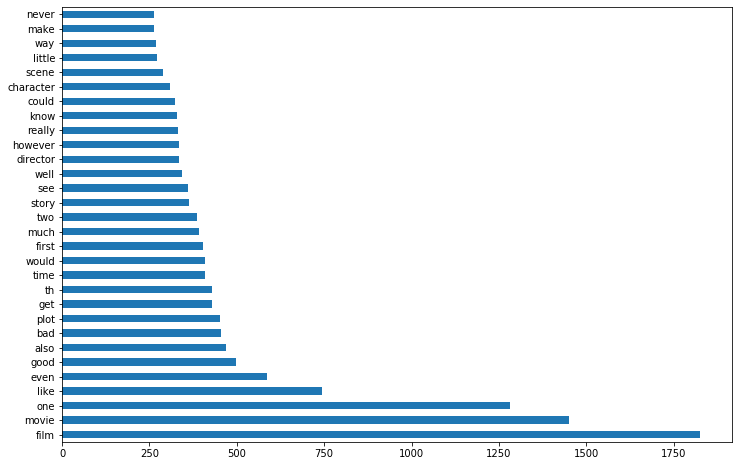

In [47]:
#Plot the top 30 words in the negative review data set
tdm_neg.sum().nlargest(30).plot.barh(figsize=(12,8))

The top ten words for the negative reviews are: film, movie, one, like, even, good, also, bad, plot, and get.<br>

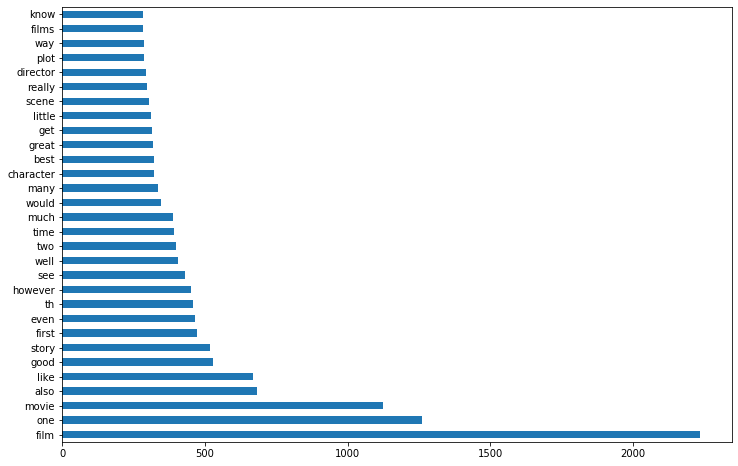

In [16]:
#Plot the top 30 words in the positive review data set
tdm_pos.sum().nlargest(30).plot.barh(figsize=(12,8))

The top ten words for the positive reviews are: film, one, movie, also, like, good, story, first, even, and th. 

The top three words in both data sets (in no particiular order) are: film, movie, and one.  The top 30 words in both data sets have 26 words in common.  The unique words in the negative review's top 30 are bad, could, make, and never.  The unique words in the positive review's top 30 are many, best, great, and films.

In [17]:
#Add a binary flag column to negative review data frame
tdm_neg['binary_flag'] = 0
tdm_neg.head()

,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaliyah,aalyah,aaron,aatish,ab,aba,aban,...,zon,zone,zones,zoo,zoologist,zooms,zoot,zucker,zwick,binary_flag
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Add a binary flag column to positive review data frame
tdm_pos['binary_flag'] = 1
tdm_pos.head()

,aardman,aaron,ab,abandon,abandoned,abandonment,abandons,abba,abbe,abberline,...,zombie,zone,zones,zoolander,zorro,zucker,zuehlke,zundel,zwick,binary_flag
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#Combine positive and negative review data frames into one data frame
dfposneg = pd.concat([tdm_pos, tdm_neg], ignore_index=True, sort=False)

#Check to see if the data appears as expected
dfposneg

,aardman,aaron,ab,abandon,abandoned,abandonment,abandons,abba,abbe,abberline,...,zilch,zimm,zip,zomb,zombies,zon,zoo,zoologist,zooms,zoot
0,0.0,0,0,0,0,0.0,0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,0,0,0,0,NaN,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,NaN,0,0,0,0,NaN,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,NaN,0,0,0,0,NaN,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,NaN,0,0,0,0,NaN,0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Number of columns in negative review data frame (including binary flag) = 19,356<br>
Number of columns in positive review data frame (including binary flag) = 20,366<br>
Number of columns in our concatenated data frame = 28,476<br>

The concatenated data frame has less than 39,721 columns (negative + positive). That means there are 11,245 columns with the same word in both the negative review and the positive review data frames.

For the NaN values that have been created in the rows, we will replace them with zeros since a missing word is valued as being seen 0 times.

In [20]:
#Check number of columns and rows in the newly concatenated data frame
dfposneg.info

<bound method DataFrame.info of       aardman  aaron  ab  abandon  abandoned  abandonment  abandons  abba  \
0         0.0      0   0        0          0          0.0         0   0.0   
1         0.0      0   0        0          0          0.0         0   0.0   
2         0.0      0   0        0          0          0.0         0   0.0   
3         0.0      0   0        0          0          0.0         0   0.0   
4         0.0      0   0        0          0          0.0         0   0.0   
...       ...    ...  ..      ...        ...          ...       ...   ...   
1995      NaN      0   0        0          0          NaN         0   NaN   
1996      NaN      0   0        0          0          NaN         0   NaN   
1997      NaN      0   0        0          0          NaN         0   NaN   
1998      NaN      0   0        0          0          NaN         0   NaN   
1999      NaN      0   0        0          0          NaN         0   NaN   

      abbe  abberline  ...  zilch  zimm  zi

In [21]:
#Substitute the null values with 0
dfposneg = dfposneg.fillna(0)
dfposneg.head()

,aardman,aaron,ab,abandon,abandoned,abandonment,abandons,abba,abbe,abberline,...,zilch,zimm,zip,zomb,zombies,zon,zoo,zoologist,zooms,zoot
0,0.0,0,0,0,0,0.0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Make sure there are no null values in the data set.

In [22]:
#Check for null values
dfposneg.isnull().sum()

aardman      0
aaron        0
ab           0
abandon      0
abandoned    0
            ..
zon          0
zoo          0
zoologist    0
zooms        0
zoot         0
Length: 28476, dtype: int64

<h3><b>Naïve Bayes Model Training</b></h3>

MultinomialNB implements the Naive Bayes algorithm for multinomially distributed data and is one of the two classic Naive Bayes variants used in text classification. This works well for data which can easily be turned into counts such as word counts in text.

Naive Bayes classifier is a general term which refers to conditional independence of each of the features in the model, while Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features.

For more information about the algorithm see the following sources:<br>
    https://scikit-learn.org/stable/modules/naive_bayes.html<br>
    https://stats.stackexchange.com/questions/33185/difference-between-naive-bayes-multinomial-naive-bayes<br>

Stuart J. Russell and Peter Norvig. 2003. Artificial Intelligence: A Modern Approach (2 ed.). Pearson Education. See p. 499 for reference to "Idiot Bayes" as well as the general definition of the Naive Bayes model and its independence assumptions. Below we will build a model with multinomial Naive Bayes.

In [49]:
#Copy data frame
dfposneg2 = dfposneg.copy(deep=True)

In [74]:
#Import dependencies
from sklearn.model_selection import train_test_split

#Select variables
X = dfposneg2.drop(['binary_flag'], axis=1)
y = dfposneg2['binary_flag']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=420)

In [75]:
#Check percentage of training data
round(len(X_train)/len(X),2)

0.75

In [76]:
#Check percentage of test data
round(len(X_test)/len(y),2)

0.25

In [77]:
#Import dependencies
from sklearn.naive_bayes import MultinomialNB

#Instantiate the multinomial Naive Bayes model
nb = MultinomialNB()

#Fit the model
nb.fit(X_train, y_train)

#Make class predictions for X_test
y_pred_class = nb.predict(X_test)

Calculate classification performance metrics

In [78]:
#Import dependencies
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, metrics

#Print the accuracy, precision, recall, and F1 Score
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.f1_score(y_test, y_pred_class))
print(metrics.precision_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class))

0.772
0.7701612903225806
0.7958333333333333
0.74609375


In [79]:
#Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class))

[[195  49]
 [ 65 191]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       244
           1       0.80      0.75      0.77       256

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.77      0.77       500



According to the confusion matrix, there are 195 true negatives, 49 false positives, 65 false negatives, and 191 true positives.  The accuracy, F1 score, precision and recall are as follows: 

|      Metrics     | NB Model| 
|:----------------:|-------  |
|     Accuracy     |  77.2%  | 
|     F1 Score     |  77.0%  |
|     Precision    |  79.6%  | 
|     Recall       |  74.6%  | 

<h3><b>Feature Analysis of Bayes Model</b></h3>

Determine importance of features in our NB model.<br>
Source: https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes

In [30]:
#Find the 30 most important features for positive and negative reviews.
import numpy as np
from sklearn import feature_extraction

neg_class_prob_sorted = nb.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()[::-1]

print(neg_class_prob_sorted[:30])
print(pos_class_prob_sorted[:30])

[ 6816 11894 12639 10565  6186  7778  1344 13596   530  7573 18195 20186
 18400  6882 11921 17336 18878 15974 14577 19871  4984 10140  3952  8730
  2859 10645 12211 15778 10966  6830]
[ 6816 12639 11894 10565   530  7778 17336  6882  8730  6186 18195 19871
 11921 18400 15974 18878 10645  7906 11053 20186  1719  2859 14577  7573
  4984 15778  6830 13596 10140 19790]


In [31]:
#Get the names of each word
colnames_neg = dfposneg.columns[neg_class_prob_sorted[:30]]
colnames_pos = dfposneg.columns[pos_class_prob_sorted[:30]]

print(colnames_neg)
print(colnames_pos)

Index(['film', 'movie', 'one', 'like', 'even', 'good', 'bad', 'plot', 'also',
       'get', 'th', 'would', 'time', 'first', 'much', 'story', 'two', 'see',
       'really', 'well', 'director', 'know', 'could', 'however', 'character',
       'little', 'never', 'scene', 'make', 'films'],
      dtype='object')
Index(['film', 'one', 'movie', 'like', 'also', 'good', 'story', 'first',
       'however', 'even', 'th', 'well', 'much', 'time', 'see', 'two', 'little',
       'great', 'many', 'would', 'best', 'character', 'really', 'get',
       'director', 'scene', 'films', 'plot', 'know', 'way'],
      dtype='object')


According to the Naive Bayes classifier, the 30 most informative negative words are very similar to the frequency list that we saw above but not in the same order.  The most informative negative words list is only different by one word when compared to the negative words' frequency list.  In the negative words frequency list, we saw the word "way", but that word did not appear in the most informative negative words like according to the Naive Bayes classifier.  Instead, we saw the word "films".

The 30 most informative positive words contain all the top 30 words we saw in the frequency list, just not in the same order. 

The 30 most informative negative and positive word lists are also very similar when compared to each other.  The only differences are that never, make, bad, and could appear in the negative list and great, many, best and way appear in the positive list.

<h3><b>Model Testing</b></h3>

Create a new review and convert to all lowercase letters.

In [32]:
new_review = """“There were some things I didn't like about this film. Here's what I remember most strongly: a man in an 
ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with a less than 
believable laugh; an ex-drug addict martian with tics; child actors who recite their lines very slowly and carefully; 
a newspaper headline declaring that Santa has been "kidnapped", and a giant robot. The least appealing acting job in the 
film must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. They seemed to display an 
exaggerated amount of fear. Perhaps this was the preferred acting style in the 1960's??”""".lower()

<b> Transform and format the new review<b>

Remove special characters

In [33]:
new_review2 = re.sub('[^A-Za-z0-9]+', ' ', new_review)
print(new_review2)

 there were some things i didn t like about this film here s what i remember most strongly a man in an ingeniously fake looking polar bear costume funnier than the bear from hercules in new york an extra with a less than believable laugh an ex drug addict martian with tics child actors who recite their lines very slowly and carefully a newspaper headline declaring that santa has been kidnapped and a giant robot the least appealing acting job in the film must be when mother claus and her elves have been frozen by the martians weapons they seemed to display an exaggerated amount of fear perhaps this was the preferred acting style in the 1960 s 


Remove numbers

In [34]:
new_review3 = ''.join([i for i in new_review2 if not i.isdigit()])
print(new_review3)

 there were some things i didn t like about this film here s what i remember most strongly a man in an ingeniously fake looking polar bear costume funnier than the bear from hercules in new york an extra with a less than believable laugh an ex drug addict martian with tics child actors who recite their lines very slowly and carefully a newspaper headline declaring that santa has been kidnapped and a giant robot the least appealing acting job in the film must be when mother claus and her elves have been frozen by the martians weapons they seemed to display an exaggerated amount of fear perhaps this was the preferred acting style in the  s 


Remove single letters

In [35]:
new_review4 = re.sub(r'(?:^| )\w(?:$| )', ' ', new_review3).strip()
print(new_review4)

there were some things didn like about this film here what remember most strongly man in an ingeniously fake looking polar bear costume funnier than the bear from hercules in new york an extra with less than believable laugh an ex drug addict martian with tics child actors who recite their lines very slowly and carefully newspaper headline declaring that santa has been kidnapped and giant robot the least appealing acting job in the film must be when mother claus and her elves have been frozen by the martians weapons they seemed to display an exaggerated amount of fear perhaps this was the preferred acting style in the


Remove stop words

In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

new_tok = word_tokenize(new_review4)
tokens_without_sw = [word for word in new_tok if not word in stopwords.words()]
print(tokens_without_sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aimhoff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['things', 'like', 'film', 'remember', 'strongly', 'ingeniously', 'fake', 'looking', 'polar', 'bear', 'costume', 'funnier', 'bear', 'hercules', 'new', 'york', 'extra', 'less', 'believable', 'laugh', 'ex', 'addict', 'martian', 'tics', 'child', 'actors', 'recite', 'lines', 'slowly', 'carefully', 'newspaper', 'headline', 'declaring', 'santa', 'kidnapped', 'giant', 'robot', 'least', 'appealing', 'acting', 'job', 'film', 'must', 'mother', 'claus', 'elves', 'frozen', 'martians', 'weapons', 'seemed', 'display', 'exaggerated', 'amount', 'fear', 'perhaps', 'preferred', 'acting', 'style']


<b> Find the frequency of the words in each class<b>

Frequency of words for negative reviews

In [37]:
word_list_neg = vec_neg.get_feature_names();    
count_list_neg = X_neg.toarray().sum(axis=0) 
freq_neg = dict(zip(word_list_neg,count_list_neg))
freq_neg

{'aaaaaaaaah': 2,
 'aaaaaaaahhhh': 1,
 'aaaaaah': 1,
 'aaliyah': 1,
 'aalyah': 1,
 'aaron': 2,
 'aatish': 1,
 'ab': 19,
 'aba': 3,
 'aban': 1,
 'abandon': 3,
 'abandoned': 3,
 'abandons': 1,
 'abberation': 1,
 'abby': 1,
 'abc': 1,
 'abducted': 1,
 'abe': 1,
 'abel': 1,
 'aber': 1,
 'aberdeen': 5,
 'abetting': 1,
 'abhorrent': 1,
 'abi': 1,
 'abigail': 4,
 'abiliti': 1,
 'abilities': 5,
 'ability': 14,
 'abject': 1,
 'abl': 2,
 'able': 36,
 'ably': 1,
 'abnormal': 1,
 'abo': 10,
 'aboard': 2,
 'abode': 1,
 'abomination': 1,
 'aborted': 1,
 'abortion': 2,
 'abortive': 1,
 'aboslu': 1,
 'abou': 13,
 'abound': 2,
 'abounds': 1,
 'abov': 1,
 'abraham': 5,
 'abrahams': 1,
 'abrams': 1,
 'abril': 1,
 'abruptly': 1,
 'absconded': 1,
 'absence': 4,
 'absences': 1,
 'absent': 8,
 'absentee': 1,
 'absolu': 1,
 'absolut': 2,
 'absolute': 9,
 'absolutely': 33,
 'absorbed': 1,
 'absorbing': 1,
 'absorbs': 1,
 'absorption': 1,
 'abstract': 2,
 'absur': 1,
 'absurd': 10,
 'absurdism': 1,
 'absurdist'

Frequency of words for positive reviews

In [38]:
word_list_pos = vec_pos.get_feature_names();    
count_list_pos = X_pos.toarray().sum(axis=0) 
freq_pos = dict(zip(word_list_pos,count_list_pos))
freq_pos

{'aardman': 2,
 'aaron': 4,
 'ab': 10,
 'abandon': 3,
 'abandoned': 5,
 'abandonment': 1,
 'abandons': 1,
 'abba': 1,
 'abbe': 3,
 'abberline': 1,
 'abbots': 1,
 'abby': 5,
 'abc': 2,
 'abducted': 1,
 'abel': 1,
 'aberdeen': 1,
 'aberration': 1,
 'abetted': 2,
 'abhorrence': 1,
 'abi': 1,
 'abides': 1,
 'abiil': 1,
 'abil': 1,
 'abili': 1,
 'abilit': 1,
 'abilities': 2,
 'ability': 23,
 'abject': 1,
 'abl': 1,
 'able': 68,
 'ably': 4,
 'abo': 12,
 'aboard': 3,
 'abode': 1,
 'abolitionists': 5,
 'aboriginal': 2,
 'abort': 1,
 'abortion': 3,
 'abortions': 1,
 'abou': 8,
 'abound': 3,
 'abounding': 1,
 'abounds': 2,
 'abov': 1,
 'abr': 1,
 'abraham': 4,
 'abrahams': 2,
 'abrasi': 1,
 'abroad': 2,
 'abrupt': 1,
 'abruptly': 2,
 'abs': 1,
 'absenc': 1,
 'absence': 5,
 'absent': 2,
 'abso': 1,
 'absol': 1,
 'absolut': 3,
 'absolute': 7,
 'absolutel': 2,
 'absolutely': 33,
 'absolutes': 1,
 'absor': 2,
 'absorb': 3,
 'absorbant': 1,
 'absorbed': 1,
 'absorbing': 5,
 'absorbs': 1,
 'abstract':

<b> Calculate the probability for each word in each class<b>

Probabilities of words in negative reviews

In [39]:
prob_neg = []
for word,count in zip(word_list_neg,count_list_neg):
    prob_neg.append(count/len(word_list_neg))
dict(zip(word_list_neg, prob_neg))

{'aaaaaaaaah': 0.00010333247222939809,
 'aaaaaaaahhhh': 5.1666236114699044e-05,
 'aaaaaah': 5.1666236114699044e-05,
 'aaliyah': 5.1666236114699044e-05,
 'aalyah': 5.1666236114699044e-05,
 'aaron': 0.00010333247222939809,
 'aatish': 5.1666236114699044e-05,
 'ab': 0.0009816584861792818,
 'aba': 0.00015499870834409713,
 'aban': 5.1666236114699044e-05,
 'abandon': 0.00015499870834409713,
 'abandoned': 0.00015499870834409713,
 'abandons': 5.1666236114699044e-05,
 'abberation': 5.1666236114699044e-05,
 'abby': 5.1666236114699044e-05,
 'abc': 5.1666236114699044e-05,
 'abducted': 5.1666236114699044e-05,
 'abe': 5.1666236114699044e-05,
 'abel': 5.1666236114699044e-05,
 'aber': 5.1666236114699044e-05,
 'aberdeen': 0.0002583311805734952,
 'abetting': 5.1666236114699044e-05,
 'abhorrent': 5.1666236114699044e-05,
 'abi': 5.1666236114699044e-05,
 'abigail': 0.00020666494445879618,
 'abiliti': 5.1666236114699044e-05,
 'abilities': 0.0002583311805734952,
 'ability': 0.0007233273056057866,
 'abject': 5

Probabilities of words in positive reviews

In [40]:
prob_pos = []
for word,count in zip(word_list_pos,count_list_pos):
    prob_pos.append(count/len(word_list_pos))
dict(zip(word_list_pos, prob_pos))

{'aardman': 9.820770930518046e-05,
 'aaron': 0.00019641541861036092,
 'ab': 0.0004910385465259023,
 'abandon': 0.0001473115639577707,
 'abandoned': 0.00024551927326295114,
 'abandonment': 4.910385465259023e-05,
 'abandons': 4.910385465259023e-05,
 'abba': 4.910385465259023e-05,
 'abbe': 0.0001473115639577707,
 'abberline': 4.910385465259023e-05,
 'abbots': 4.910385465259023e-05,
 'abby': 0.00024551927326295114,
 'abc': 9.820770930518046e-05,
 'abducted': 4.910385465259023e-05,
 'abel': 4.910385465259023e-05,
 'aberdeen': 4.910385465259023e-05,
 'aberration': 4.910385465259023e-05,
 'abetted': 9.820770930518046e-05,
 'abhorrence': 4.910385465259023e-05,
 'abi': 4.910385465259023e-05,
 'abides': 4.910385465259023e-05,
 'abiil': 4.910385465259023e-05,
 'abil': 4.910385465259023e-05,
 'abili': 4.910385465259023e-05,
 'abilit': 4.910385465259023e-05,
 'abilities': 9.820770930518046e-05,
 'ability': 0.0011293886570095753,
 'abject': 4.910385465259023e-05,
 'abl': 4.910385465259023e-05,
 'abl

Now that we know the probability of occurrence of word in a class, we can substitute the values in the probability equations for our new review.<br>

P(tokens_without_sw|neg) = P(things|neg) x P(like|neg) X P(film|neg) X P(remember|neg) X P(strongly|neg)...<br>
P(tokens_without_sw|pos) = P(things|pos) x P(like|pos) X P(film|pos) X P(remember|pos) X P(strongly|pos)...<br>

The equations will go on until the probability of all 58 words from the new review are included.<br>
Source:https://medium.com/analytics-vidhya/naive-bayes-classifier-for-text-classification-556fabaf252b

Total count of all features in the data set

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(X)
total_features = len(vec.get_feature_names())
total_features

28475

Total count of all features in a positive or negative review

In [42]:
total_cnts_features_pos = count_list_pos.sum(axis=0)
total_cnts_features_neg = count_list_neg.sum(axis=0)
print(total_cnts_features_pos)
print(total_cnts_features_neg)

134468
126265


Probability with Laplace smoothing for all words in negative reviews

In [43]:
prob_with_ls_neg = []
for word in tokens_without_sw:
    if word in freq_neg.keys():
        count = freq_neg[word]
    else:
        count = 0
    prob_with_ls_neg.append((count + 1)/(total_cnts_features_neg + total_features))
dict(zip(tokens_without_sw,prob_with_ls_neg))

{'things': 0.0010856921287320668,
 'like': 0.004808065141527724,
 'film': 0.01180043944681401,
 'remember': 0.0003683598293912369,
 'strongly': 3.2312265736073417e-05,
 'ingeniously': 6.462453147214683e-06,
 'fake': 9.047434406100556e-05,
 'looking': 0.0005557709706604627,
 'polar': 1.2924906294429366e-05,
 'bear': 8.401189091379088e-05,
 'costume': 3.2312265736073417e-05,
 'funnier': 2.5849812588858732e-05,
 'hercules': 6.462453147214683e-06,
 'new': 0.0013635776140622981,
 'york': 0.00018094868812201112,
 'extra': 9.693679720822024e-05,
 'less': 0.00038128473568566627,
 'believable': 9.047434406100556e-05,
 'laugh': 0.0002972728447718754,
 'ex': 0.00038774718883288094,
 'addict': 4.523717203050278e-05,
 'martian': 3.2312265736073417e-05,
 'tics': 6.462453147214683e-06,
 'child': 0.0001874111412692258,
 'actors': 0.0009435181594933436,
 'recite': 1.2924906294429366e-05,
 'lines': 0.0003037352979190901,
 'slowly': 9.047434406100556e-05,
 'carefully': 3.8774718883288094e-05,
 'newspaper

Probability with Laplace smoothing for all words in positive reviews

In [44]:
prob_with_ls_pos = []
for word in tokens_without_sw:
    if word in freq_pos.keys():
        count = freq_pos[word]
    else:
        count = 0
    prob_with_ls_pos.append((count + 1)/(total_cnts_features_pos + total_features))
dict(zip(tokens_without_sw,prob_with_ls_pos))

{'things': 0.001024898277311698,
 'like': 0.004105730224679796,
 'film': 0.013710315877331337,
 'remember': 0.0003559526951142424,
 'strongly': 5.5234038897037616e-05,
 'ingeniously': 1.8411346299012538e-05,
 'fake': 3.6822692598025075e-05,
 'looking': 0.00036822692598025074,
 'polar': 6.13711543300418e-06,
 'bear': 4.295980803102925e-05,
 'costume': 5.5234038897037616e-05,
 'funnier': 2.454846173201672e-05,
 'hercules': 2.454846173201672e-05,
 'new': 0.0014544963576219906,
 'york': 0.00019638769385613375,
 'extra': 0.00010433096236107105,
 'less': 0.0004725578883413218,
 'believable': 0.00010433096236107105,
 'laugh': 0.00025162173275317134,
 'ex': 0.0002700330790521839,
 'addict': 6.13711543300418e-06,
 'martian': 6.13711543300418e-06,
 'tics': 1.227423086600836e-05,
 'child': 0.00027617019448518805,
 'actors': 0.0007241796210944931,
 'recite': 6.13711543300418e-06,
 'lines': 0.00023321038645415882,
 'slowly': 0.0001779763475571212,
 'carefully': 6.750826976304597e-05,
 'newspaper': 

Multiply all new review probability values with the negative review probabilities <br>
Source: https://www.geeksforgeeks.org/python-multiply-numbers-list-3-different-ways/

In [96]:
#List using traversal 
def multiplyList(prob_with_ls_neg) :
     
    # Multiply elements one by one
    result = 1
    for x in prob_with_ls_neg:
         result = result * x
    return result

print(multiplyList(prob_with_ls_neg))

#P(neg|tokens_without_sw) = P(tokens_without_sw|neg) x P(neg)
print(multiplyList(prob_with_ls_neg)*0.5)

4.310410906465534e-230
2.155205453232767e-230


Multiply all new review probability values with the positive review probabilities <br>

In [97]:
def multiplyList2(prob_with_ls_pos) :
     
    # Multiply elements one by one
    result = 1
    for x in prob_with_ls_pos:
         result = result * x
    return result

print(multiplyList2(prob_with_ls_pos))

#P(pos|tokens_without_sw) = P(tokens_without_sw|pos) x P(pos)
print(multiplyList2(prob_with_ls_pos)*0.5)

2.7951552206374095e-231
1.3975776103187047e-231


<b>2.16E-230 > 1.40E-231 </b><br>
This previously unseen review would be classified as negative which is what we expected.  This is an accurate classification as the review sounded like it had negative connotation.

<h3><b>Conclusion</b></h3>

While our Multinomial Bayes Classifier was moderately successful at determining whether a movie review was positive or negative, (all scores in the 70s), it also did a good job at classifying the additional review as negative.